In [1]:
from twython import Twython
import json
import pandas as pd
from collections import Counter
import itertools
import re

In [2]:
# load credentials
with open('twitter_credentials.json','r') as file:
    creds = json.load(file)

In [92]:
# this will create the main object where methods will be called from
first_tweets = Twython(creds['CONSUMER_KEY'], creds['CONSUMER_SECRET'])

# query
query = {
    'q':'Trump, 2020',
    'result_type':'popular',
    'count':1000,
    'lang':'en'
}

In [93]:
# using the first_tweets object and query, create a dict and view it as a df

new_dict = {'user': [], 'date_orig': [], 'text': [], 'favorite_count': []}
# need to ensure tweet_mode='extended' more than 140 char are returned. 
# does not include RT, which is fine for now, later an option to include RT can be included
for status in first_tweets.search(**query,tweet_mode='extended')['statuses']:
    new_dict['user'].append(status['user']['screen_name'])
    new_dict['date_orig'].append(status['created_at'])
    new_dict['text'].append(status['full_text'])
    new_dict['favorite_count'].append(status['favorite_count'])



In [96]:
# create df and clean-up dates
df = pd.DataFrame(new_dict)

# remove 'RT' tweets b/c they are only 140 char
df = df[~df["text"].str.contains('RT')]

# clean up text col
unwanted_values = ['\n', '&amp;', 'https', 'the', 'a', 't', 's', 'co']
for i in unwanted_values:
    df["text"] = df["text"].str.replace(i,'')

# clean up date col
df["date_orig"] = pd.to_datetime(df.date_orig)
df["date"] = df.date_orig.dt.strftime('%Y-%m-%d')

# find all instances of unique strings in text col
lst = df["text"].tolist()
all_words_lst = [re.findall('\w+',x) for x in lst]
# make a flat list, a dictionary with the counter, and a df
flat_lst = list(itertools.chain.from_iterable(all_words_lst))

counter_dict = dict(Counter(flat_lst),index=[0])

df_counter = pd.DataFrame(counter_dict)
df_counter = df_counter.T
df_counter = df_counter.reset_index()
df_counter.columns = ["word","occurences"]
final_df = df_counter.sort_values(by="occurences",ascending=False).head(25)




In [40]:
import seaborn as sns
import matplotlib.pyplot as plt

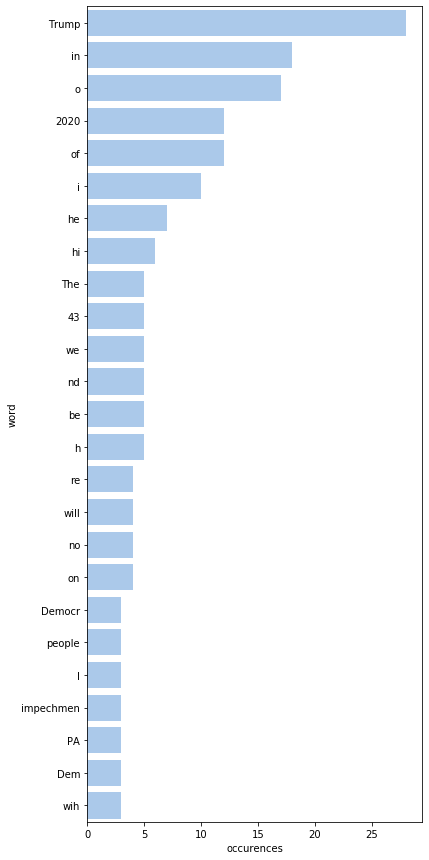

In [98]:
# size of plot
f, ax = plt.subplots(figsize=(6, 15))

# plot color
sns.set_color_codes("pastel")
sns.barplot(x="occurences", y="word", data=final_df,
            label="Total", color="b")